In [1]:
import pandas as pd
import numpy as np 

import json
from pandas import json_normalize

import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import folium

from bs4 import BeautifulSoup
import geopy
import requests

In [2]:
url_mumbai='https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'
url_delhi='https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi'

In [3]:
def mumbai_neighbor(url_mumbai):
    neighbor_mumbai=[]
    result=requests.get(url_mumbai).text
    soup=BeautifulSoup(result,'html.parser')
    for i in soup.find_all('h3'):
        x=i.find('a')
        try:
            neighbor_mumbai.append(x.next_element)
        except:
            pass
    return neighbor_mumbai

In [4]:
def delhi_neighbor(urld):
    neighbor_delhi=[]
    html_data_delhi=requests.get(url_delhi).text
    soup_delhi=BeautifulSoup(html_data_delhi,'html.parser')
    for i in soup_delhi.find_all('li'):
        try:
            x=i.a   
            if '<' in str(x.next_element):
                pass
            else:
                neighbor_delhi.append(x.next_element)
        except:
            neighbor_delhi.append(list(i.descendants)[0])
    return neighbor_delhi[:119]

In [5]:
delhi_neighbors=delhi_neighbor(url_delhi)

In [6]:
def location_finder(x,state):
    address='{}, {}'.format(x['Neighborhood'],state)
    geolocator=geopy.geocoders.Nominatim(user_agent='neighod')
    g=geolocator.geocode(address)
    try:
        x.loc['Latitude']=g.latitude
        x.loc['Longitude']=g.longitude
        x.loc['Importance']=g.raw['importance']
    except:
        x.loc['Latitude']=np.nan
        x.loc['Longitude']=np.nan
        x.loc['Importance']=np.nan


In [9]:
def dataframe_creation(data_list,state):
    columns=['Neighborhood','Latitude','Longitude','Importance']
    dataframe=pd.DataFrame(columns=columns)
    dataframe['Neighborhood']=data_list
    dataframe.apply(location_finder,axis=1,args=(state,))
    return dataframe

In [10]:
delhi_dataframe=dataframe_creation(delhi_neighbors,'Delhi')
delhi_dataframe

,Neighborhood,Latitude,Longitude,Importance
0,Adarsh Nagar,28.7166,77.1704,0.708428
1,Ashok Vihar,28.6995,77.1848,0.311
2,Begum Pur,28.7255,77.0584,0.585
3,Karala,28.7351,77.0325,0.47
4,Narela,28.8426,77.0918,0.500666
...,...,...,...,...
114,Rajouri Garden,28.6451,77.1239,0.56
115,Tihar Village,28.6346,77.1071,0.373151
116,Tilak Nagar,28.6365,77.0965,0.682128
117,Vikas Nagar,28.644,77.0545,0.56


In [11]:
delhi_dataframe.to_csv('Data/delhi_dataframe.csv')

In [12]:
mumbai_neighbors=mumbai_neighbor(url_mumbai)

In [14]:
mumbai_dataframe=dataframe_creation(mumbai_neighbors,'Mumbai')

In [15]:
mumbai_dataframe

,Neighborhood,Latitude,Longitude,Importance
0,Andheri,19.1197,72.8464,0.580152
1,Mira-Bhayandar,19.2821,72.8741,0.311
2,Bandra,19.055,72.8402,0.559056
3,Borivali,19.2291,72.8574,0.58818
4,Dahisar,19.2495,72.8596,0.572959
5,Goregaon,19.1648,72.85,0.557785
6,Jogeshwari,19.1349,72.8488,0.498689
7,Juhu,19.107,72.8275,0.598549
8,Kandivali west,19.2084,72.8422,0.585
9,Kandivali east,19.2104,72.8641,0.585


In [144]:
map_creater(nearby_delhi,'DElhi')

blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue


In [146]:
def map_creater(dataframe,state,user_agent='map_default'):
    geolocator=geopy.geocoders.Nominatim(user_agent=user_agent)
    g=geolocator.geocode(state)
    map_created=folium.Map(location=[g.latitude,g.longitude],zoom_start=11)
    for index,row in dataframe.iterrows():
        if row.Latitude is not np.nan or row.Longitude is not np.nan:
            array=plt.cm.Spectral(row['Importance'])
            label='{},{}'.format(row['Neighborhood'],state)
            color=colors.rgb2hex(array)
            label=folium.Popup(label,parse_html=False)
            folium.CircleMarker(location=[row['Latitude'],row['Longitude']],
                                radius=5,
                                weight=2,
                                color='black',
                                fill=True,
                                fill_color=color,
                                fill_opacity =0.8,
                                popup=label).add_to(map_created)
    return map_created

In [147]:
map_creater(delhi_dataframe,'Delhi')


In [148]:
map_creater(mumbai_dataframe,'Mumbai')

In [19]:
def top_10(dataframe):
    dataframe['Importance']=dataframe['Importance'].astype('float')
    dataframe=dataframe.sort_values(by='Importance',ascending=False)
    dataframe=dataframe.round({'Importance':2})
    return dataframe[:10] 

In [20]:
top_delhi=top_10(delhi_dataframe)
top_mumbai=top_10(mumbai_dataframe)

In [21]:
def get_credentials():
    Client_Id='30YJZ4SVOKWOSS5A3B5XVEDPGKRA0GLAUIU4GMKZ1K5KLS1C'
    Client_Secret='IE1AV21QGBW1AJMA4WUKPUVMIOPWIXPENYVKLTRYAC5VSZEM'
    Version='20200502'
    Limit=500
    Radius=50
    return [Client_Id,Client_Secret,Version,Limit,Radius]

In [22]:
def get_categories(row):
    try:
        cat=row['categories']
    except:
        cat=row['venue.categories']
        
    if len(cat)==0:
        return None
    else:
        return cat[0]['name']

In [39]:
def get_places(dataframe):
    new_data=pd.DataFrame(columns=['Name','Categories','Latitude','Longitude'])
    for index,row in dataframe.iterrows():
        url_foursquare='https://api.foursquare.com/v2/venues/explore?&client_id={0[0]}&client_secret={0[1]}&v={0[2]}&ll={1},{2}&radius={0[4]}&limit={0[3]}'.format(get_credentials(),row['Latitude'],row['Longitude'])
        result=requests.get(url_foursquare).json()
        #print(result['response']['groups'],end='\n\n\n')
        try:
            data=json_normalize(result['response']['groups'][0]['items'])
            data['venue.categories']=data.apply(get_categories,axis=1)
            for name,categories,latitude,longitude in zip (data['venue.name'],data['venue.categories'],data['venue.location.lat'],data['venue.location.lng']):
                new_data=new_data.append({'Neighborhood':row['Neighborhood'],'Name': name,'Categories':categories,'Latitude':latitude,'Longitude':longitude},ignore_index=True)             
        except:
            pass
    return new_data

In [40]:
nearby_delhi=get_places(delhi_dataframe)

In [41]:
nearby_mumbai=get_places(mumbai_dataframe)


In [42]:
nearby_delhi

,Name,Categories,Latitude,Longitude,Neighborhood
0,Adarsh Nagar Metro Station,Light Rail Station,28.716598,77.170436,Adarsh Nagar
1,Sagar Ratna,Indian Restaurant,28.702969,77.132464,Pitam Pura
2,Pitampura Metro Station,Metro Station,28.703198,77.132263,Pitam Pura
3,WOODLAND Furnitures Pvt Ltd,Furniture / Home Store,28.703032,77.132632,Pitam Pura
4,Sheviks Toys,Toy / Game Store,28.567578,77.159343,Rohini Sub City
...,...,...,...,...,...
71,Kings Kulfi,Ice Cream Shop,28.657584,77.142511,Moti Nagar
72,Orbit Imaging & Pathlab Pvt Ltd,Spa,28.657839,77.142476,Moti Nagar
73,Moti Nagar Metro Station,Metro Station,28.657830,77.142445,Moti Nagar
74,Tilak Nagar Metro Station,Metro Station,28.636513,77.096429,Tilak Nagar


In [43]:
nearby_mumbai

,Name,Categories,Latitude,Longitude,Neighborhood
0,McDonald's,Fast Food Restaurant,19.119691,72.846102,Andheri
1,McDonald's,Fast Food Restaurant,19.119672,72.846791,Andheri
2,Ideal Bakery,Burger Joint,19.119833,72.846174,Andheri
3,Bandra Railway Station,Train Station,19.054999,72.840235,Bandra
4,soda lounge,Brewery,19.054923,72.840317,Bandra
5,Hind bar & restaurant,Indian Restaurant,19.055054,72.840364,Bandra
6,Bombay Blue,Italian Restaurant,19.055186,72.839896,Bandra
7,Cafe Coffee Day,Café,19.249136,72.859616,Dahisar
8,Sai Veg World,Indian Restaurant,19.164901,72.850406,Goregaon
9,Gokul Dairy,Food & Drink Shop,19.134719,72.849243,Jogeshwari


###  Visulization

In [96]:
def bar_categories(dataframe,state):
    X=dataframe.groupby('Categories',as_index=False).count()
    plt.title('Venues Near '+state,fontdict={'family': 'serif','color':  'Red','size': 25})
    plot=plt.barh(X['Categories'],X['Name'])
    plt.xlabel('count',fontdict={'family': 'Verdana','color':  'green','size': 15})
    plt.ylabel('Categories',fontdict={'family': 'Verdana','color':  'green','size': 15})
    return plot 

<BarContainer object of 41 artists>

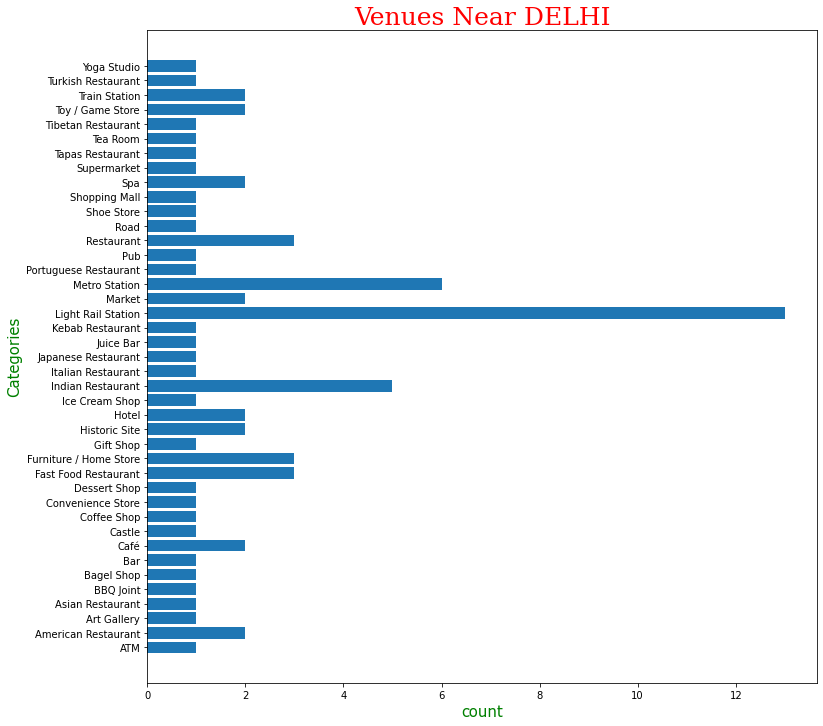

In [99]:
plt.figure(figsize=(12,12))
bar_categories(nearby_delhi,'DELHI')

<BarContainer object of 19 artists>

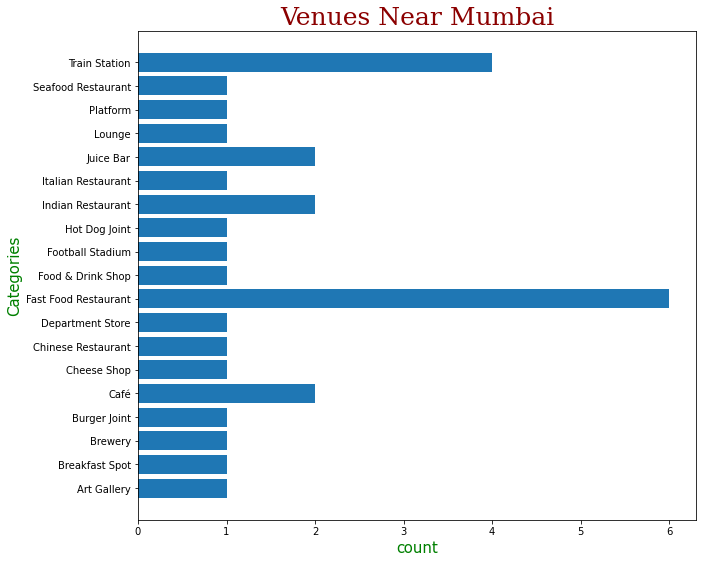

In [87]:
plt.figure(figsize=(10,9))
bar_categories(nearby_mumbai,'Mumbai')